<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/24.%EC%A0%81%EC%A0%88%ED%95%9C_%EC%B2%99%EB%8F%84_%EC%84%A0%ED%83%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#적절한 척도 선택하기

이전 비디오에서 무작위로 하이퍼파라미터를 찾는 것이 더 효율적인 탐색이라는 것을 배웠다!

> 하지만 무작위는 가능한 값들을 공정하게 뽑는 것이지는 않다

어떤 레이어 l에 대해서 은닉 유닛의 수가 $n^l$을 정한다고 할 떄
($n^l = 50 \sim 100$)

이런 경우 50 ~ 100까지의 수직선에서 무작위 값을 고른다고 할 때  > 비합리적

Layers 값 L = 2 ~ 4  > 가능한 값 중 무작위로 뽑는게 합리적인 경우



학습율 $\alpha$를 탐색하는데 범위로 0.0001 ~ 1까지 생각하고 있다고 합시다.

균일하게 무작위 값을 고릅니다.

여기서 약 90%의 샘플이 0.1과 1사이에 있을 겁니다. 
> 즉 값이 치우치게나옴 > 범위가 큰 부분이 많이 나옴

10%만을 0.0001과 0.1 사이를 탐색하는데 쓰임 
> 비합리적

선형 척도(Linear scale) 대신 로그 척도에서 하이퍼파라미터를 찾는 것이 더 합리적입니다.


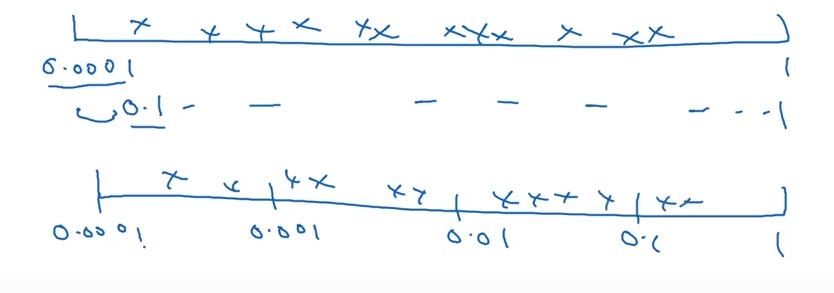

이렇게 로그 척도로 0.001과 0.001 사이 0.001과 0.01사이를 탐색할 때 이전과 비해 더 많은 횟수의 탐색이 가능! > 더 균일해서 합리적임

파이썬에서 구현하는 방법

r = -4 * np.random.rand() 여기서 r은 -4 ~ 0사이의 무작위 값

$\alpha = 10^r$ 는 $10^-4 \sim 10^0$사이값이 됨

$10^4 = 0.001$ 맨 첫 부분을 의미

그리고 $log_{10} 0.0001 = -4$ 가 random 값에 들어가는 것



## 지수 가중 평균에서 $\beta$

$\beta = 0.9 \sim 0.999$ 범위를 탐색

베타가 0.9면 최근 10일의 평균 기온처럼 마지막 10개 값의 평균과 비슷해짐

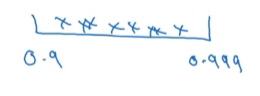

0.9~0.999를 균일하게 무작위 탐색하는 것보다 $1 - \beta$를 탐색하는 것이 효울적

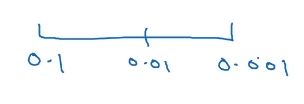



이전 로그 척도를 보면 작은 값이 왼쪽에 있었는데 이번엔 작은 값이 오른쪽에 존재

r = -3 ~ -1 까지 뽑아서 10의 제곱으로 생각하면 됩니다. 그러면

$1 - \beta = 10^r$

$\beta = 1 - 10^r$

선형 척도(Linear scale)에서는 $\beta$가 1에 가깝다면 아주 조금만 바뀌어도 결과가 아주 많이 바뀌게 됩니다.

만약 $\beta$가 0.9000에서 0.9005로 바뀌면 똑같이 10개의 값에 대해서 구하지만

$\beta$가 0.999에서 0.9995로 바뀌면 1000개의 값에서 2000개의 값의 평균을 내는 것으로 바뀌게 됩니다.

 $\beta$가 1에 가까워질수록 작은 변화에도 민감하게 반응하기 때문입니다.

 그래서 $\beta$가 1보다 가까운 곳에서 더 조밀하게, 더 많이 뽑히게 됩니다.




즉 적절한 scale(척도)를 사용하는 것이 중요하지만

잘못된 척도를 사용하더라도 정밀화 접근을 하면 그래도 좋은 값을 얻을 수 있다!